In [281]:
from scipy import stats
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [282]:
dataFrame = pd.read_csv('HR_data.csv')
dataFrame = dataFrame.drop(dataFrame.columns[0], axis=1)
dataFrame

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.000,3.345290,73.23,83.37,22924.945,round_3,phase3,1,1,1,D1_1
1,70.981097,70.570,2.517879,67.12,78.22,21930.400,round_3,phase2,1,1,5,D1_1
2,73.371959,73.360,3.259569,67.88,80.22,21647.085,round_3,phase1,1,1,0,D1_1
3,78.916822,77.880,4.054595,72.32,84.92,25258.905,round_2,phase3,1,1,1,D1_1
4,77.322226,74.550,6.047603,70.52,90.15,23890.565,round_2,phase2,1,1,5,D1_1
...,...,...,...,...,...,...,...,...,...,...,...,...
163,73.594539,72.380,9.474556,57.43,93.53,21482.985,round_4,phase2,14,0,8,D1_2
164,57.839897,54.130,6.796647,52.97,74.14,16825.740,round_4,phase1,14,0,0,D1_2
165,64.237295,65.195,3.589241,58.97,72.63,18691.065,round_1,phase3,14,0,1,D1_2
166,70.834320,70.440,2.391160,66.65,76.07,20753.005,round_1,phase2,14,0,4,D1_2


## 1. Prepare data for machine learning

#### Boxplot & Distributions of features + standized

In [283]:
features = dataFrame[['HR_Mean',	'HR_Median',	'HR_std',	'HR_Min',	'HR_Max',	'HR_AUC']]

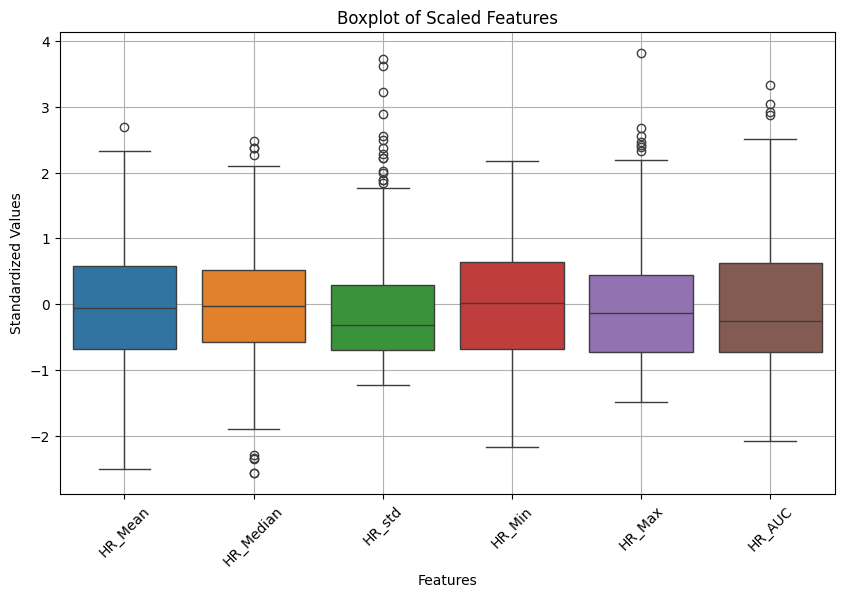

In [284]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_Features = pd.DataFrame(scaled_features, columns=features.columns)

plt.figure(figsize=(10, 6))
sns.boxplot(data=scaled_Features)
plt.title('Boxplot of Scaled Features')
plt.xlabel('Features')
plt.ylabel('Standardized Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

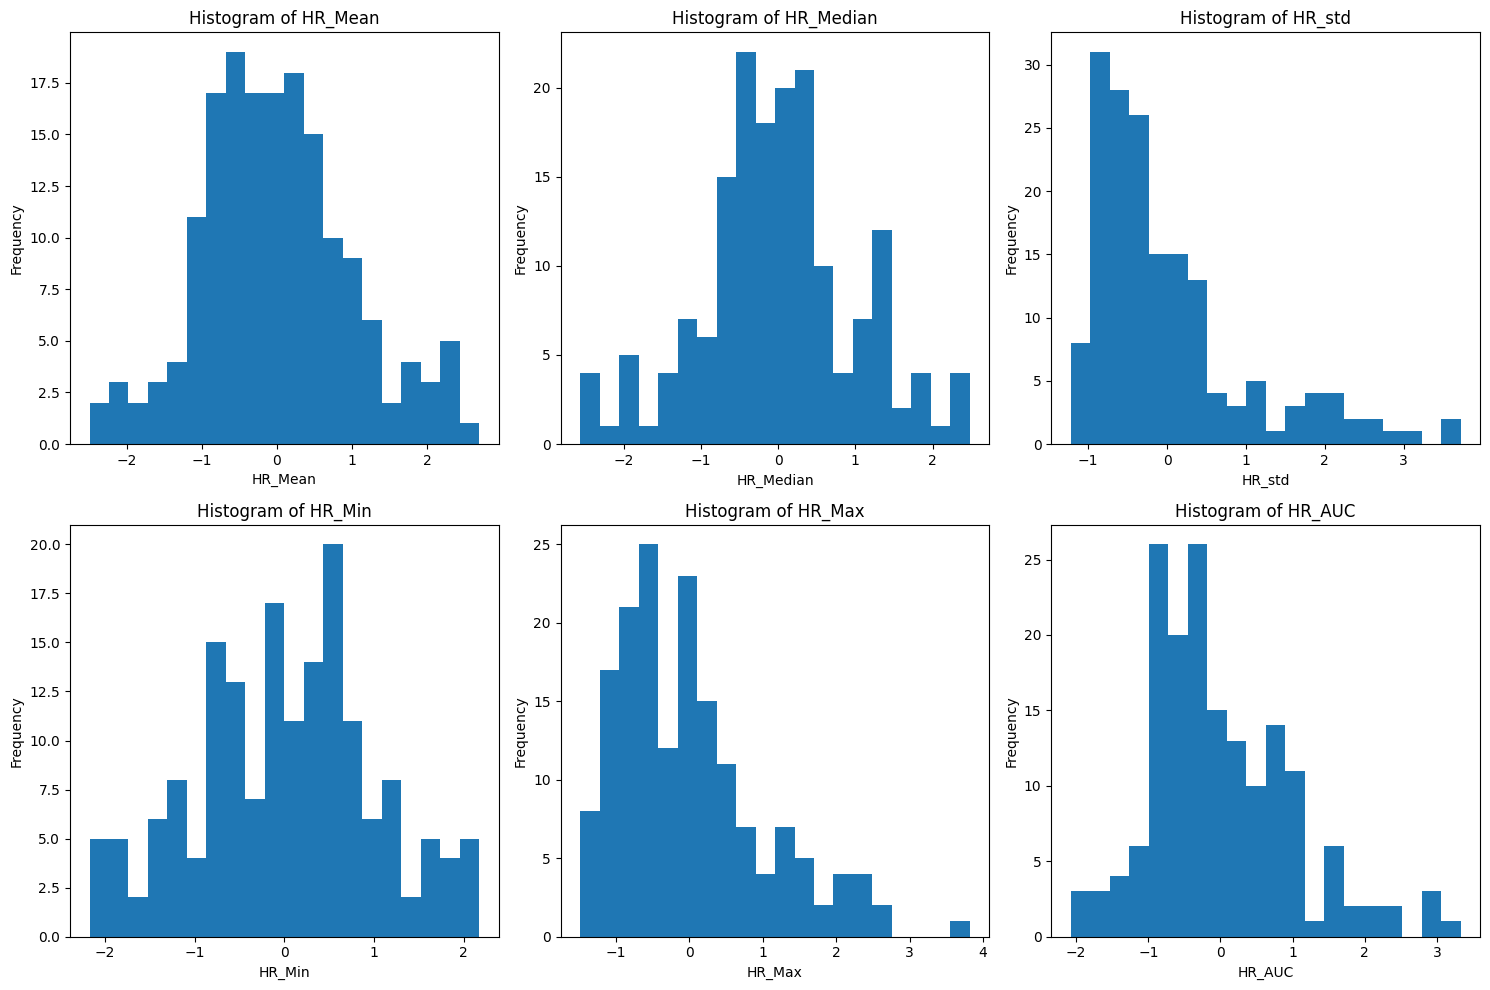

In [285]:
import matplotlib.pyplot as plt


features = scaled_Features[['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']]

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes for easier indexing
axs = axs.flatten()

# Plot histograms for each feature
for i, column in enumerate(features.columns):
    axs[i].hist(features[column], bins=20)
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Vi kan se at HR_std og HR_Max begge kan logificeres

#### Frustrated vs Features boxplot

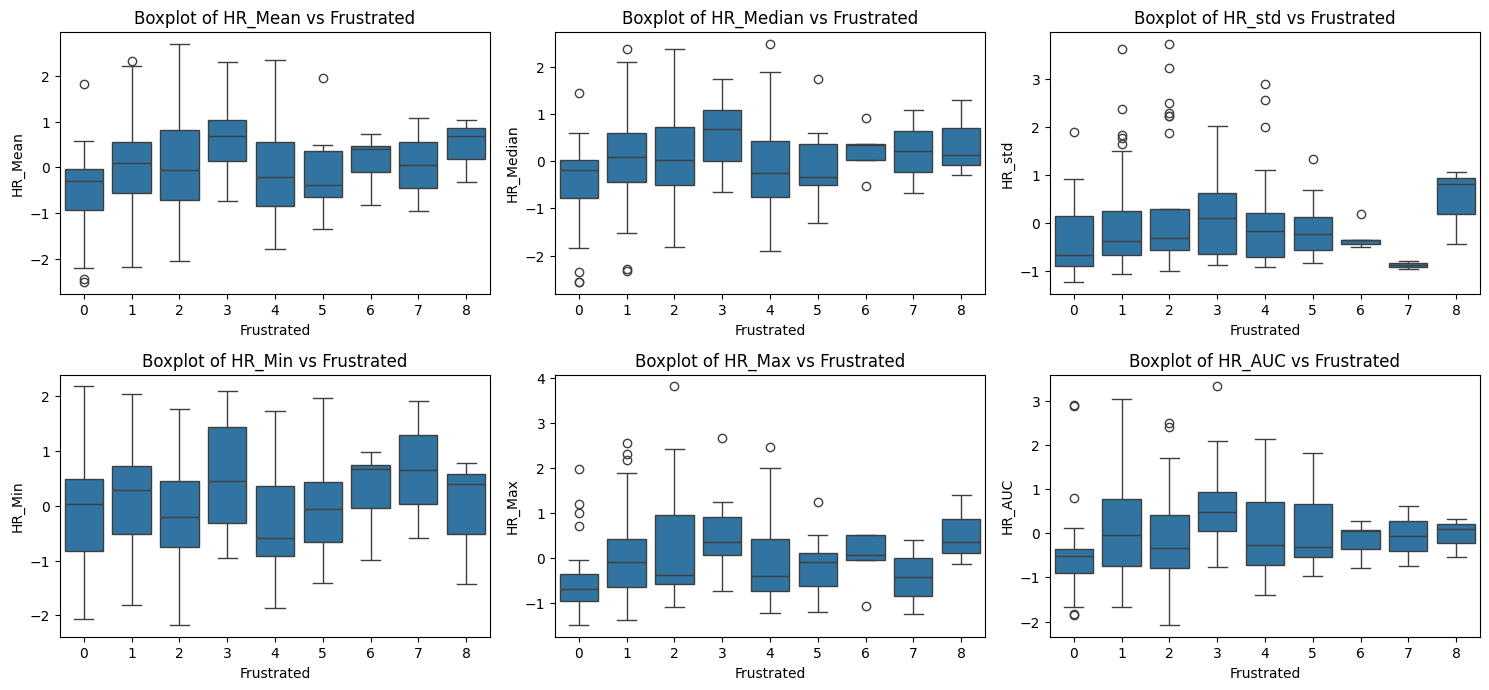

In [286]:
df = scaled_Features.iloc[:, :] #First 6 items
last = dataFrame.iloc[:, -2] #Last item

plot = pd.concat([df, last], axis=1)

# List of features to plot
featuress = ['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']

# Plot boxplots for each feature against 'Frustrated'
plt.figure(figsize=(15, 10))
for i, feature in enumerate(featuress, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Frustrated', y=feature, data=plot)
    plt.title(f'Boxplot of {feature} vs Frustrated')

plt.tight_layout()
plt.show()

#### Kig på outliers i HR_STD -> Log transformation

In [287]:
before = dataFrame['HR_std']
dataFrame['HR_std'] = np.log(dataFrame['HR_std'])

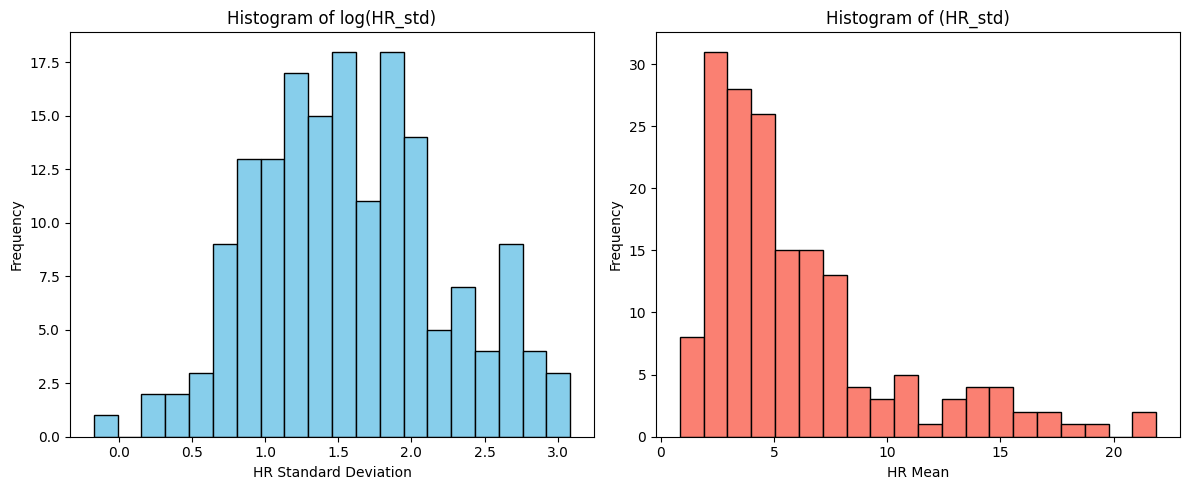

In [288]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, 2, figsize=(12, 5))


axs[0].hist(dataFrame['HR_std'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Histogram of log(HR_std)')
axs[0].set_xlabel('HR Standard Deviation')
axs[0].set_ylabel('Frequency')

# Plot histogram for the second column (e.g., HR_Mean)
axs[1].hist(before, bins=20, color='salmon', edgecolor='black')
axs[1].set_title('Histogram of (HR_std)')
axs[1].set_xlabel('HR Mean')
axs[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

#### Kig på outliers i HR_Max -> Log transformation

In [289]:
before = dataFrame['HR_Max']
dataFrame['HR_Max'] = np.log(dataFrame['HR_Max'])

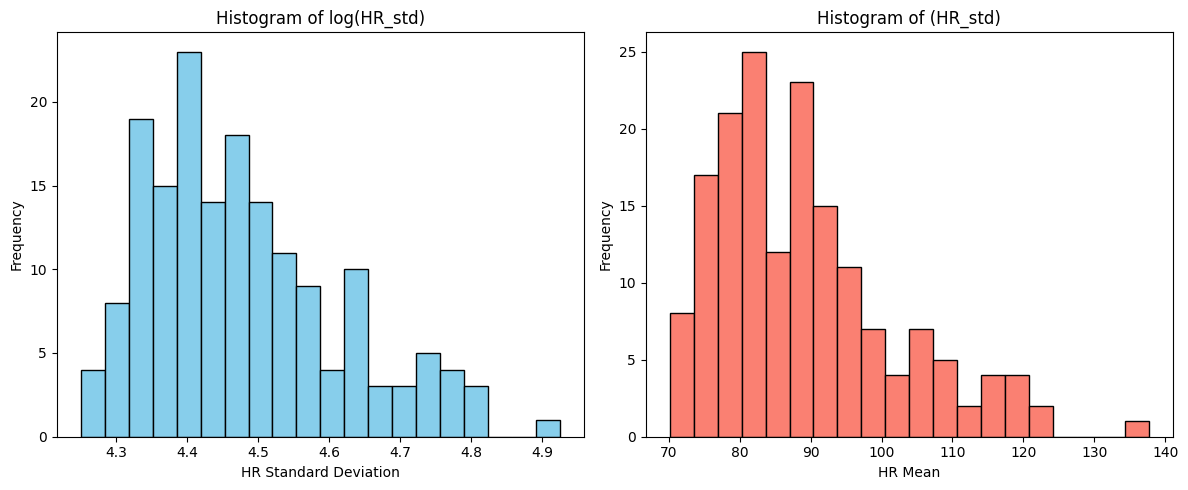

In [290]:
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for the first column (HR_std)
axs[0].hist(dataFrame['HR_Max'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Histogram of log(HR_std)')
axs[0].set_xlabel('HR Standard Deviation')
axs[0].set_ylabel('Frequency')

# Plot histogram for the second column (e.g., HR_Mean)
axs[1].hist(before, bins=20, color='salmon', edgecolor='black')
axs[1].set_title('Histogram of (HR_std)')
axs[1].set_xlabel('HR Mean')
axs[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

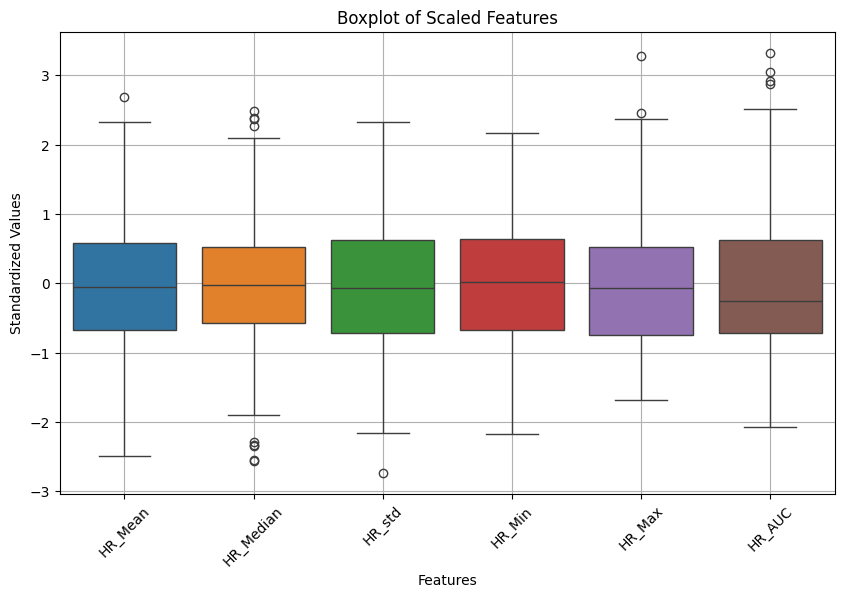

In [291]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataFrame.iloc[:, :-6])


scaled_Features = pd.DataFrame(scaled_features, columns=features.columns)

plt.figure(figsize=(10, 6))
sns.boxplot(data=scaled_Features)
plt.title('Boxplot of Scaled Features')
plt.xlabel('Features')
plt.ylabel('Standardized Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Feature boxplots over frustation

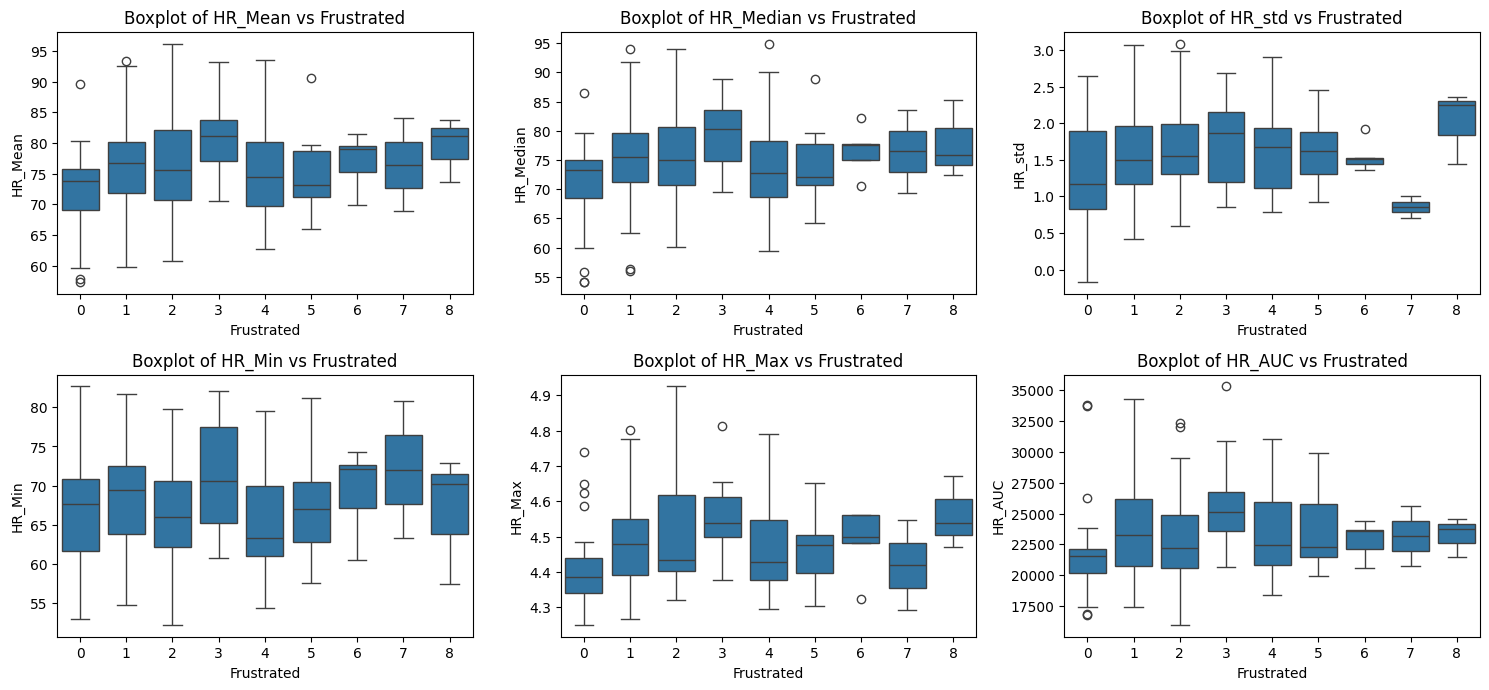

In [292]:
df = dataFrame


featuress = ['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']

# Plot boxplots for each feature against 'Frustrated'
plt.figure(figsize=(15, 10))
for i, feature in enumerate(featuress, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Frustrated', y=feature, data=df)
    plt.title(f'Boxplot of {feature} vs Frustrated')

plt.tight_layout()
plt.show()

#### Correlation efter transformation

#### Class imbalance

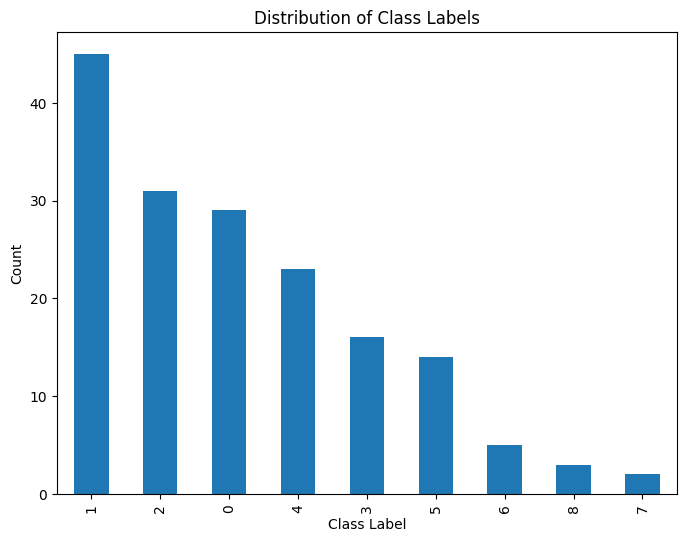

Class Counts:
Frustrated
1    45
2    31
0    29
4    23
3    16
5    14
6     5
8     3
7     2
Name: count, dtype: int64


In [293]:
import matplotlib.pyplot as plt


class_counts = df['Frustrated'].value_counts()

# Plot the distribution of class labels
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Distribution of Class Labels')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()


print("Class Counts:")
print(class_counts)

## 1.1 Argumentation for group-k-fold

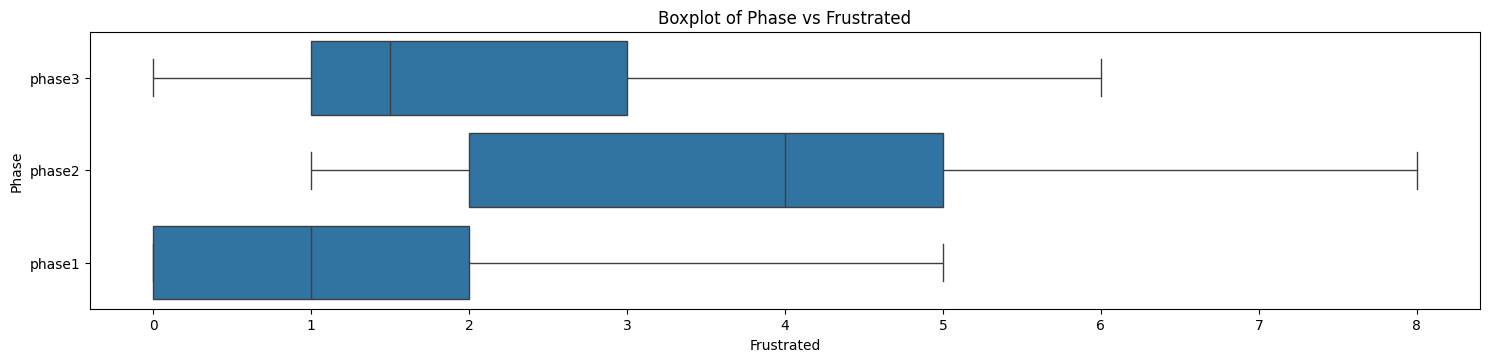

In [294]:

plot = pd.concat([df, last], axis=1)


featuress = ['Phase']

# Plot boxplots for each feature against 'Frustrated'
plt.figure(figsize=(15, 10))
for i, feature in enumerate(featuress, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(x='Frustrated', y=feature, data=dataFrame.iloc[:,:-1])
    plt.title(f'Boxplot of {feature} vs Frustrated')

plt.tight_layout()
plt.show()

We know that Phase 1: before puzzle, Phase 2: During puzzles, Phase 3: After puzzle. This distinction is important, since the frustration level depends on what you are doing, therefore we will logicaly group phases together using group-k-fold

## 2. AI models
> **Build two or more different machine learning (ML/AI) models to predict/classify the different levels of frustration based on the HR features. Choices to make:**

> (a) How many competing models (>= 2).

I would like to compare 2 models

> (b) Which AI models (can be ML models, eg: RF, decision-trees, logistic regressions, ANN,
etc). No extra points for the most sophisticated model.

##### M1: MLPClassifier

/Users/glymov/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/glymov/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/glymov/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold Accuracy: 0.32142857142857145


/Users/glymov/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/glymov/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/glymov/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold Accuracy: 0.10714285714285714
Fold Accuracy: 0.125
Mean Cross-Validation Accuracy: 0.18452380952380953
Mean Cross-Validation F1 Score: 0.11246143668538704
Mean Cross-Validation Balanced Accuracy: 0.13517080565169537
Mean Cross-Validation Precision: 0.21689406823335397
Mean Cross-Validation Recall: 0.18452380952380953


/Users/glymov/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/glymov/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


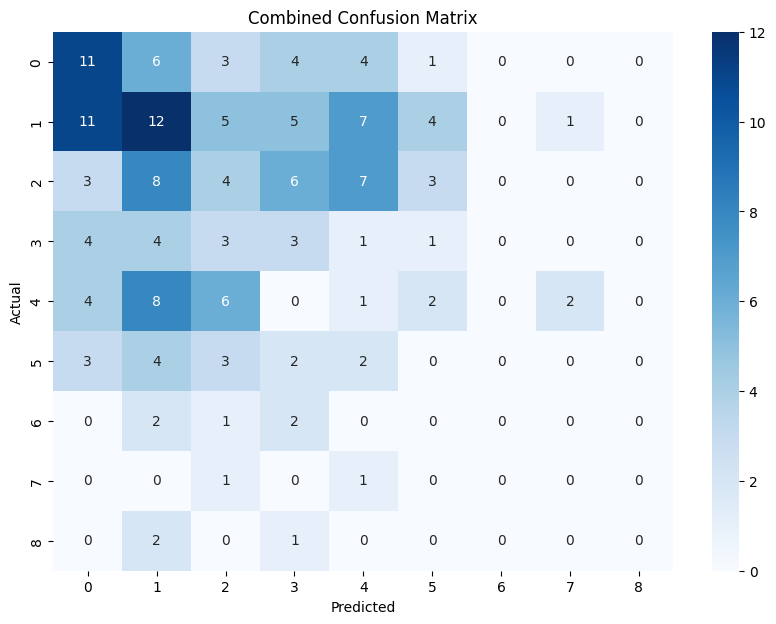

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.decomposition import PCA
from joblib import dump, load
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


df = dataFrame


X = df[['HR_Mean', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']]
y = df['Frustrated']
groups = df['Phase']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA 
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)


dt = DecisionTreeClassifier(max_depth=10)

# Define the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(25, 10,5), activation='relu', solver='adam' ,max_iter=25000, learning_rate='constant', random_state=1)

# Lists to store the results of each fold
accuracy_scores = []
f1_scores = []
balanced_accuracy_scores = []
precision_scores = []
recall_scores = []

# Determine all unique classes
all_classes = np.unique(y)

# Initialize combined confusion matrix
combined_cm = np.zeros((len(all_classes), len(all_classes)), dtype=int)

#  roupKFold cross-validation
gkf = GroupKFold(n_splits=3)
# Perform cross-validation using a loop
for train_index, test_index in gkf.split(X_pca, y, groups):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    mlp.fit(X_train, y_train)

    # Predict on the test data
    y_pred = mlp.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test.to_numpy(), y_pred)
    accuracy_scores.append(accuracy)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred, average='macro')
    f1_scores.append(f1)

    # Calculate balanced accuracy
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy_scores.append(balanced_accuracy)

    # Calculate precision
    precision = precision_score(y_test, y_pred, average='weighted')
    precision_scores.append(precision)

    # Calculate recall
    recall = recall_score(y_test, y_pred, average='weighted')
    recall_scores.append(recall)

    # Calculate confusion matrix and accumulate
    cm = confusion_matrix(y_test, y_pred, labels=all_classes)
    combined_cm += cm
    
    print(f"Fold Accuracy: {accuracy}")

# Save the final model after cross-validation
dump(mlp, 'ANN.joblib')


# Calculate mean values
M1mean_accuracy = np.mean(accuracy_scores)
M1mean_f1 = np.mean(f1_scores)
M1mean_balanced_accuracy = np.mean(balanced_accuracy_scores)
M1mean_precision = np.mean(precision_scores)
M1mean_recall = np.mean(recall_scores)

AccuracyM1Array = accuracy_scores
BalancedAccuracyM1Array = balanced_accuracy_scores
F1AccuracyM1Array = f1_scores

# Print mean values
print("Mean Cross-Validation Accuracy:", M1mean_accuracy)
print("Mean Cross-Validation F1 Score:", M1mean_f1)
print("Mean Cross-Validation Balanced Accuracy:", M1mean_balanced_accuracy)
print("Mean Cross-Validation Precision:", M1mean_precision)
print("Mean Cross-Validation Recall:", M1mean_recall)


# Plot the combined confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_classes, yticklabels=all_classes)
plt.title('Combined Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### M2: Descision tree + Adaboost

/Users/glymov/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/glymov/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/glymov/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/glymov/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

Fold Accuracy: 0.30357142857142855


/Users/glymov/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/glymov/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/glymov/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/glymov/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and 

Fold Accuracy: 0.21428571428571427


/Users/glymov/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/glymov/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold Accuracy: 0.125
Mean Cross-Validation Accuracy: 0.21428571428571427
Mean Cross-Validation F1 Score: 0.14280535932321647
Mean Cross-Validation Balanced Accuracy: 0.17495315733880892
Mean Cross-Validation Precision: 0.29989662531679334
Mean Cross-Validation Recall: 0.21428571428571427


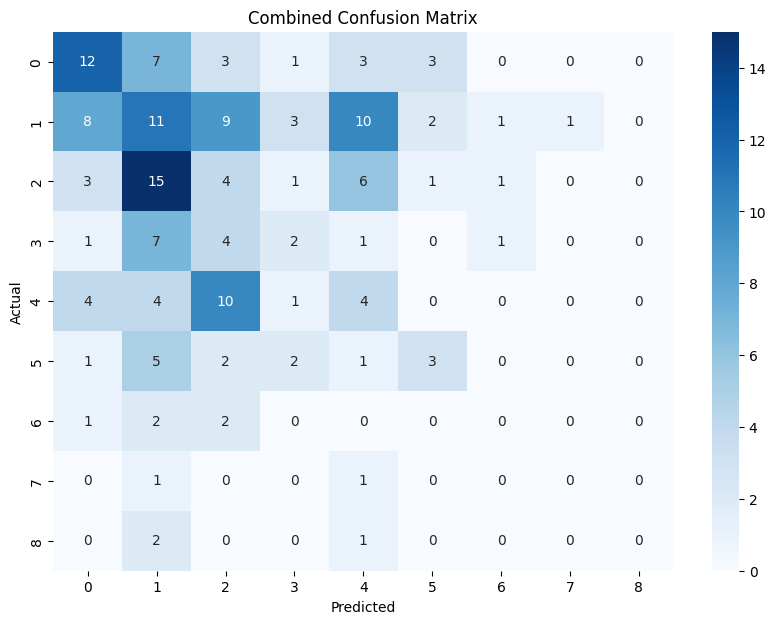

In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.decomposition import PCA
from joblib import dump, load
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


df = dataFrame

# Define features and target
X = df[['HR_Mean', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']]
y = df['Frustrated']
groups = df['Phase']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA 
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Define the DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10)

# Define the AdaBoostClassifier with DecisionTreeClassifier
mlp = AdaBoostClassifier(base_estimator=dt, n_estimators=1000, random_state=1)

# Lists to store the results of each fold
accuracy_scores = []
f1_scores = []
balanced_accuracy_scores = []
precision_scores = []
recall_scores = []

# Determine all unique classes
all_classes = np.unique(y)

# Initialize combined confusion matrix
combined_cm = np.zeros((len(all_classes), len(all_classes)), dtype=int)

# Perform cross-validation using a loop
for train_index, test_index in gkf.split(X_pca, y, groups):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    mlp.fit(X_train, y_train)

    # Predict on the test data
    y_pred = mlp.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test.to_numpy(), y_pred)
    accuracy_scores.append(accuracy)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred, average='macro')
    f1_scores.append(f1)

    # Calculate balanced accuracy
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy_scores.append(balanced_accuracy)

    # Calculate precision
    precision = precision_score(y_test, y_pred, average='weighted')
    precision_scores.append(precision)

    # Calculate recall
    recall = recall_score(y_test, y_pred, average='weighted')
    recall_scores.append(recall)

    # Calculate confusion matrix and accumulate
    cm = confusion_matrix(y_test, y_pred, labels=all_classes)
    combined_cm += cm
    
    print(f"Fold Accuracy: {accuracy}")

# Save the final model after cross-validation
dump(mlp, 'DescAda.joblib')


# Calculate mean values
M2mean_accuracy = np.mean(accuracy_scores)
M2mean_f1 = np.mean(f1_scores)
M2mean_balanced_accuracy = np.mean(balanced_accuracy_scores)
M2mean_precision = np.mean(precision_scores)
M2mean_recall = np.mean(recall_scores)
AccuracyM2Array = accuracy_scores

AccuracyM2Array = accuracy_scores
BalancedAccuracyM2Array = balanced_accuracy_scores
F1AccuracyM2Array = f1_scores

# Print mean values
print("Mean Cross-Validation Accuracy:", M2mean_accuracy)
print("Mean Cross-Validation F1 Score:", M2mean_f1)
print("Mean Cross-Validation Balanced Accuracy:", M2mean_balanced_accuracy)
print("Mean Cross-Validation Precision:", M2mean_precision)
print("Mean Cross-Validation Recall:", M2mean_recall)


# Plot the combined confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_classes, yticklabels=all_classes)
plt.title('Combined Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## 3. Validation & Evaluation
> 3.  Compare the performances of your developed models using suitable statistical tests (if applicable).Some clues to answer this question:
> 
> • Model robustness to changes in data
> 
> • Model generalization
> 
> • Consistenc

##### Model evaluation

Firstly i will compare the mean accuracies using cochrans Q test, after that i will if nessecary use post hoc mc nemars pair wise test

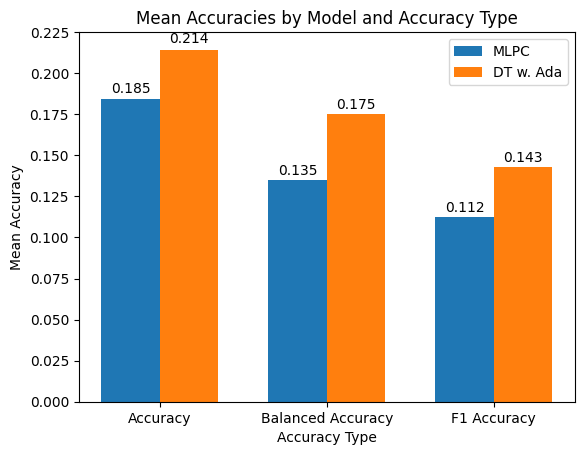

In [297]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate means
means_M1 = [np.mean(AccuracyM1Array), np.mean(BalancedAccuracyM1Array), np.mean(F1AccuracyM1Array)]
means_M2 = [np.mean(AccuracyM2Array), np.mean(BalancedAccuracyM2Array), np.mean(F1AccuracyM2Array)]

labels = ['Accuracy', 'Balanced Accuracy', 'F1 Accuracy']
bar_width = 0.35

# Create figure and axis
fig, ax = plt.subplots()

# Create bars
bar1 = ax.bar(np.arange(len(labels)), means_M1, bar_width, label='MLPC')
bar2 = ax.bar(np.arange(len(labels)) + bar_width, means_M2, bar_width, label='DT w. Ada')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Accuracy Type')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Mean Accuracies by Model and Accuracy Type')
ax.set_xticks(np.arange(len(labels)) + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

# Add mean accuracy values on top of the bars
for rect in bar1 + bar2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2., 1.01*height,
            '%.3f' % float(height),
            ha='center', va='bottom')

# Show the plot
plt.show()


#### Non parametric bootstrap confidence interval

In [300]:
# Number of bootstrap samples
num_bootstraps = 10000

# Function to calculate bootstrap means
def bootstrap_means(data, num_bootstraps):
    bootstrapped_means = []
    for _ in range(num_bootstraps):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_means.append(np.mean(bootstrap_sample))
    return np.sort(bootstrapped_means)


# Calculate bootstrap means and confidence intervals for each group
group1_bootstrapped_means = bootstrap_means(AccuracyM1Array, num_bootstraps)
group1_ci = np.percentile(group1_bootstrapped_means, [2.5, 97.5])
print("95% Confidence Interval for Group 1 Mean:", group1_ci)

group2_bootstrapped_means = bootstrap_means(BalancedAccuracyM1Array, num_bootstraps)
group2_ci = np.percentile(group2_bootstrapped_means, [2.5, 97.5])
print("95% Confidence Interval for Group 2 Mean:", group2_ci)

group3_bootstrapped_means = bootstrap_means(F1AccuracyM1Array, num_bootstraps)
group3_ci = np.percentile(group3_bootstrapped_means, [2.5, 97.5])
print("95% Confidence Interval for Group 2 Mean:", group3_ci)


95% Confidence Interval for Group 1 Mean: [0.10714286 0.32142857]
95% Confidence Interval for Group 2 Mean: [0.06749513 0.24897959]
95% Confidence Interval for Group 2 Mean: [0.05583433 0.20520833]


#### Hypothethis test

In [299]:
from scipy.stats import wilcoxon


accuracies1 = BalancedAccuracyM1Array
accuracies2 = BalancedAccuracyM2Array

# Wilcoxon signed-rank test
w, p = wilcoxon(accuracies1, accuracies2)

print(f"W-statistic: {w}")
print(f"P-value: {p}")


W-statistic: 0.0
P-value: 0.25
